In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer, f1_score, recall_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import plotly.express as px
import plotly.graph_objects as go

sns_palette = sns.color_palette("Set1")

In [42]:
lrn = pd.read_csv('hepatitis.data')

In [43]:
lrn = lrn.replace('?', np.nan)
lrn = lrn.apply(pd.to_numeric)
lrn.columns = lrn.columns.str.replace(' ', '')
lrn

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [44]:
cats = ['class', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 
      'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 
     'spiders', 'ascites', 'varices', 'histology']
for i in cats:
    lrn[i] = lrn[i].apply(lambda x: np.nan if pd.isnull(x) else x-1)

In [45]:
lrn

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,1,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,1,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,1,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,1,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [46]:
y = lrn['class']
X = lrn.drop(['class'], axis=1)

In [47]:
X = X.dropna(axis='columns', how='all')

In [48]:
X.columns[X.isnull().any()]

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [49]:
X = X.fillna(X.mean())

In [50]:
X[['steroid', 'fatigue','anorexia', 'malaise', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']] = X[['steroid', 'fatigue','anorexia', 'malaise', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']].round()

In [51]:
X

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,61.852273,0
1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,61.852273,0
2,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,61.852273,0
3,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,105.325397,200.0,4.0,61.852273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,105.325397,242.0,3.3,50.000000,1
151,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,61.852273,1
152,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,61.852273,1
153,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


### Hold-out

In [52]:
def hold_out(model_label, model, X, y, scale=None, n=10):

    # if a scaling method is given, perform scaling
    if scale is not None:
        model = make_pipeline(scale, model)

    # dataframe for results for each split
    results = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])
    #results = []

    # perform the hold out method n times with n different seeds
    for i in range(n):

        # split the data into training and testing set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)

        # train the model on the train set
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        tr_time = end - start

        # predict values for the test set
        y_predicted = model.predict(X_test)
        
        # calculate metrics
        acc = accuracy_score(y_test, y_predicted)
        r = recall_score(y_test, y_predicted)
        f1 = f1_score(y_test, y_predicted)
        f2 = fbeta_score(y_test, y_predicted, beta=2)

        result =  {'Split/Fold': i,
                   'Method': 'Hold out',
                    'Algorithm': model_label, 
                    'Scaling': 'None' if scale is None else type(scale).__name__,
                    'Accuracy': acc,
                    'Recall': r,
                    'F1-score': f1,
                    'F2-score': f2,
                    'Training time': tr_time}
        
        results.loc[len(results)] = result

    return results

In [53]:
res_ho = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

res_ho =  pd.concat([res_ho, hold_out("SVM", SVC(), X, y)])
res_ho =  pd.concat([res_ho, hold_out("SVM", SVC(), X, y, scale=StandardScaler())])
res_ho =  pd.concat([res_ho, hold_out("SVM", SVC(), X, y, scale=MinMaxScaler())])

res_ho = pd.concat([res_ho, hold_out("Logistic Regression", LogisticRegression(), X, y)])
res_ho = pd.concat([res_ho, hold_out("Logistic Regression", LogisticRegression(), X, y, scale=StandardScaler())])
res_ho = pd.concat([res_ho, hold_out("Logistic Regression", LogisticRegression(), X, y, scale=MinMaxScaler())])

res_ho = pd.concat([res_ho, hold_out("Decision Tree", DecisionTreeClassifier(), X, y)])
res_ho = pd.concat([res_ho, hold_out("Decision Tree", DecisionTreeClassifier(), X, y, scale=StandardScaler())])
res_ho = pd.concat([res_ho, hold_out("Decision Tree", DecisionTreeClassifier(), X, y, scale=MinMaxScaler())])

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages

In [54]:
res_ho

,Split/Fold,Method,Algorithm,Scaling,Accuracy,Recall,F1-score,F2-score,Training time
0,0,Hold out,SVM,None,0.743590,1.000000,0.852941,0.935484,0.009000
1,1,Hold out,SVM,None,0.794872,1.000000,0.885714,0.950920,0.003998
2,2,Hold out,SVM,None,0.743590,1.000000,0.852941,0.935484,0.004000
3,3,Hold out,SVM,None,0.820513,1.000000,0.901408,0.958084,0.003000
4,4,Hold out,SVM,None,0.846154,1.000000,0.916667,0.964912,0.004000
...,...,...,...,...,...,...,...,...,...
5,5,Hold out,Decision Tree,MinMaxScaler,0.717949,0.812500,0.825397,0.817610,0.003998
6,6,Hold out,Decision Tree,MinMaxScaler,0.692308,0.741935,0.793103,0.761589,0.004005
7,7,Hold out,Decision Tree,MinMaxScaler,0.641026,0.655172,0.730769,0.683453,0.003999
8,8,Hold out,Decision Tree,MinMaxScaler,0.769231,0.812500,0.852459,0.828025,0.004000


In [55]:
res_ho.groupby(['Algorithm', 'Scaling']).agg({'Accuracy': [ 'min', 'mean', 'max', 'std']})

Accuracy                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.641026  0.756410  0.897436  0.084827
                    None            0.666667  0.789744  0.871795  0.060194
                    StandardScaler  0.692308  0.787179  0.871795  0.056759
Logistic Regression MinMaxScaler    0.769231  0.846154  0.897436  0.034188
                    None            0.769231  0.853846  0.897436  0.041959
                    StandardScaler  0.769231  0.864103  0.897436  0.041959
SVM                 MinMaxScaler    0.794872  0.846154  0.897436  0.031980
                    None            0.743590  0.797436  0.846154  0.040901
                    StandardScaler  0.794872  0.841026  0.897436  0.035857

In [56]:
res_ho.groupby(['Algorithm', 'Scaling']).agg({'F2-score': [ 'min', 'mean', 'max', 'std']})

F2-score                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.683453  0.831112  0.958084  0.081628
                    None            0.688406  0.859441  0.925926  0.074385
                    StandardScaler  0.719424  0.855552  0.925926  0.058606
Logistic Regression MinMaxScaler    0.900000  0.931446  0.960265  0.022070
                    None            0.886076  0.931167  0.960265  0.026506
                    StandardScaler  0.859873  0.931531  0.966667  0.032526
SVM                 MinMaxScaler    0.903226  0.933435  0.958084  0.016581
                    None            0.935484  0.951237  0.964912  0.011829
                    StandardScaler  0.897436  0.934103  0.958084  0.019008

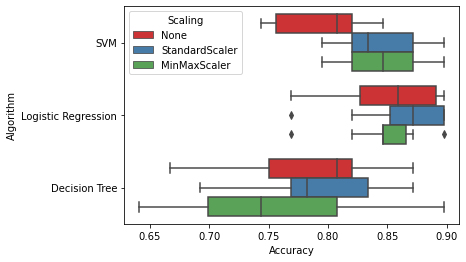

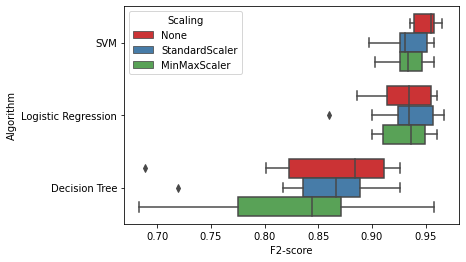

In [57]:
sns.boxplot(y="Algorithm", x="Accuracy",
            hue="Scaling", palette=sns_palette,
            data=res_ho)
plt.show()
sns.boxplot(y="Algorithm", x="F2-score",
            hue="Scaling", palette=sns_palette,
            data=res_ho)
plt.show()

### Cross-validation

In [58]:
def cross_validation(model_label, model, X, y, scale=None):

    # if a scaling method is given, perform scaling
    if scale is not None:
        model = make_pipeline(scale, model)

    # dataframe for results of each fold
    results = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

    cval = cross_validate(model, X, y, scoring={'accuracy': 'accuracy', 
                                               'recall': 'recall',
                                               'f1': 'f1', 
                                               'f2': make_scorer(fbeta_score, beta=2)}, 
                         n_jobs=-1)
    
    for i in range(len(cval['test_accuracy'])):
        # fetch calculated metrics
        acc = cval['test_accuracy'][i]
        r = cval['test_recall'][i]
        f1 = cval['test_f1'][i]
        f2 = cval['test_f2'][i]
        tr_time = cval['fit_time'][i]

        result =   {'Split/Fold': i+1,
                    'Method':'Cross-validation',
                    'Algorithm': model_label, 
                    'Scaling': 'None' if scale is None else type(scale).__name__,
                    'Accuracy': acc,
                    'Recall': r,
                    'F1-score': f1,
                    'F2-score': f2,
                    'Training time': tr_time}
        results.loc[len(results)] = result
    
    return results

In [59]:
res_cv = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

In [60]:
res_cv =  pd.concat([res_cv, cross_validation("SVM", SVC(), X, y)])
res_cv =  pd.concat([res_cv, cross_validation("SVM", SVC(), X, y, scale=StandardScaler())])
res_cv =  pd.concat([res_cv, cross_validation("SVM", SVC(), X, y, scale=MinMaxScaler())])

In [61]:
res_cv = pd.concat([res_cv, cross_validation("Logistic Regression", LogisticRegression(), X, y)])
res_cv = pd.concat([res_cv, cross_validation("Logistic Regression", LogisticRegression(), X, y, scale=StandardScaler())])
res_cv = pd.concat([res_cv, cross_validation("Logistic Regression", LogisticRegression(), X, y, scale=MinMaxScaler())])

In [62]:
res_cv = pd.concat([res_cv, cross_validation("Decision Tree", DecisionTreeClassifier(), X, y)])
res_cv = pd.concat([res_cv, cross_validation("Decision Tree", DecisionTreeClassifier(), X, y, scale=StandardScaler())])
res_cv = pd.concat([res_cv, cross_validation("Decision Tree", DecisionTreeClassifier(), X, y, scale=MinMaxScaler())])

In [63]:
res_cv

,Split/Fold,Method,Algorithm,Scaling,Accuracy,Recall,F1-score,F2-score,Training time
0,1,Cross-validation,SVM,None,0.806452,1.000000,0.892857,0.954198,0.006991
1,2,Cross-validation,SVM,None,0.806452,1.000000,0.892857,0.954198,0.005998
2,3,Cross-validation,SVM,None,0.806452,1.000000,0.892857,0.954198,0.004997
3,4,Cross-validation,SVM,None,0.774194,1.000000,0.872727,0.944882,0.005998
4,5,Cross-validation,SVM,None,0.774194,1.000000,0.872727,0.944882,0.005994
0,1,Cross-validation,SVM,StandardScaler,0.838710,1.000000,0.909091,0.961538,0.009001
1,2,Cross-validation,SVM,StandardScaler,0.903226,0.960000,0.941176,0.952381,0.009003
2,3,Cross-validation,SVM,StandardScaler,0.903226,1.000000,0.943396,0.976563,0.009995
3,4,Cross-validation,SVM,StandardScaler,0.870968,0.958333,0.920000,0.942623,0.008996
4,5,Cross-validation,SVM,StandardScaler,0.774194,0.750000,0.837209,0.782609,0.008003


In [64]:
res_cv.groupby(['Algorithm', 'Scaling']).agg({'Accuracy': [ 'min', 'mean', 'max', 'std']})

Accuracy                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.677419  0.761290  0.838710  0.062883
                    None            0.677419  0.767742  0.838710  0.057705
                    StandardScaler  0.677419  0.767742  0.838710  0.062050
Logistic Regression MinMaxScaler    0.741935  0.838710  0.903226  0.068430
                    None            0.838710  0.851613  0.870968  0.017668
                    StandardScaler  0.806452  0.845161  0.870968  0.026989
SVM                 MinMaxScaler    0.741935  0.845161  0.903226  0.069934
                    None            0.774194  0.793548  0.806452  0.017668
                    StandardScaler  0.774194  0.858065  0.903226  0.053978

In [65]:
res_cv.groupby(['Algorithm', 'Scaling']).agg({'F2-score': [ 'min', 'mean', 'max', 'std']})

F2-score                              
                                         min      mean       max       std
Algorithm           Scaling                                               
Decision Tree       MinMaxScaler    0.743802  0.835110  0.891473  0.057183
                    None            0.743802  0.835967  0.923077  0.065741
                    StandardScaler  0.743802  0.830317  0.923077  0.066662
Logistic Regression MinMaxScaler    0.745614  0.908021  0.954198  0.091025
                    None            0.854701  0.917690  0.961538  0.044154
                    StandardScaler  0.818966  0.915911  0.961538  0.056538
SVM                 MinMaxScaler    0.745614  0.914334  0.976563  0.095083
                    None            0.944882  0.950472  0.954198  0.005103
                    StandardScaler  0.782609  0.923143  0.976563  0.079549

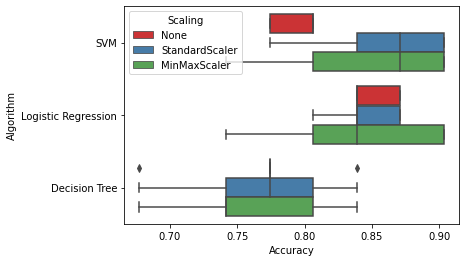

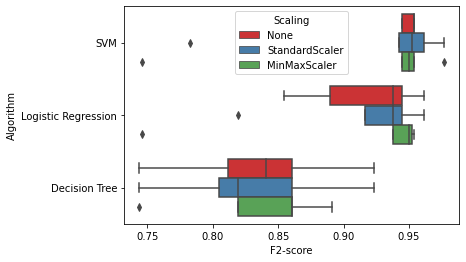

In [66]:
sns.boxplot(y="Algorithm", x="Accuracy",
            hue="Scaling", palette=sns_palette,
            data=res_cv)
plt.show()
sns.boxplot(y="Algorithm", x="F2-score",
            hue="Scaling", palette=sns_palette,
            data=res_cv)
plt.savefig('hepatitis-sc.png')

In [67]:
res_joint =  pd.concat([res_ho, res_cv])

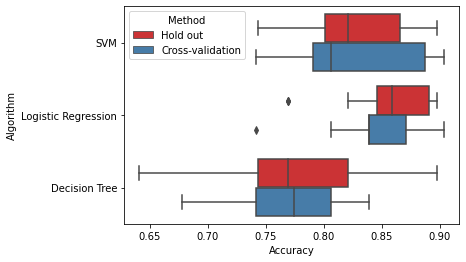

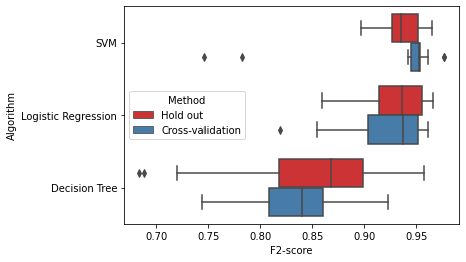

In [68]:
sns.boxplot(y="Algorithm", x="Accuracy",
            hue="Method", palette=sns_palette,
            data=res_joint)
plt.show()
sns.boxplot(y="Algorithm", x="F2-score",
            hue="Method", palette=sns_palette,
            data=res_joint)
plt.savefig('hepatitis-method.png')

## Hyperparameter tuning

In [69]:
preproc = lambda x: x.split("__",1)[1]

def plot_grid_search(scores, hyperparameters, scale=None):
    data = pd.DataFrame(hyperparameters)
    
    # fix feature names
    if scale is not None:
        data.columns = [preproc(col) for col in data.columns.values] 
        
    data['mean_test_score'] = scores
    
    # fix categorical values
    categorical = data.select_dtypes(exclude='number').columns.values
    for c in categorical:
        oe = OrdinalEncoder()
        data[[c]] = oe.fit_transform(data[[c]])

    fig = px.parallel_coordinates(data, color=data.columns.values[-1], color_continuous_scale=px.colors.sequential.Viridis
                                 )
    fig.show()

def grid_search(model, X, y, hyperparams, scoring, plot=True, metric=None, scale=None):
    if scale is not None:
        model = make_pipeline(scale, model)
    else:
        hyperparams = {preproc(k): v for k, v in hyperparams.items()}
    search = GridSearchCV(model, param_grid=hyperparams)
    search.fit(X,y)
    scores = search.cv_results_['mean_test_score']
    hyperparameters = search.cv_results_['params']
    if plot:
        plot_grid_search(scores, hyperparameters, scale)
    return search.best_params_

In [70]:
params_svm = {
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
    }

params_lr = {
    'logisticregression__penalty': ['none','l1', 'l2', 'elasticnet'],
    'logisticregression__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'logisticregression__solver': ['saga', 'sag', 'lbfgs']
    }

params_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': ['sqrt', 'log2'],
    'decisiontreeclassifier__ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
    }

In [71]:
f2 = make_scorer(fbeta_score, beta=2)

In [72]:
best_svm = grid_search(SVC(), X, y, hyperparams = params_svm, scoring=f2, scale=StandardScaler())
best_svm

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [73]:
best_lr = grid_search(LogisticRegression(), X, y, hyperparams = params_lr, scoring=f2, scale=MinMaxScaler())
best_lr

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anacond

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\38599\anacond

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

C:\Users\38599\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

{'logisticregression__C': 1e-05,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'saga'}

In [74]:
best_dt = grid_search(DecisionTreeClassifier(), X, y, hyperparams = params_dt, scoring=f2, scale=MinMaxScaler())
best_dt

{'decisiontreeclassifier__ccp_alpha': 0.0001,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': 'log2',
 'decisiontreeclassifier__min_samples_leaf': 4,
 'decisiontreeclassifier__min_samples_split': 5}

## Best models comparison

In [75]:
res_best = pd.DataFrame(columns=['Split/Fold', 'Method', 'Algorithm', 'Scaling', 'Accuracy', 'Recall', 'F1-score', 'F2-score', 'Training time'])

In [76]:
best_svm = {preproc(k): v for k, v in best_svm.items()}
best_lr = {preproc(k): v for k, v in best_lr.items()}
best_dt = {preproc(k): v for k, v in best_dt.items()}

In [77]:
res_best = pd.concat([res_best, cross_validation("SVM", SVC(**best_svm), X, y, scale=StandardScaler())])
res_best = pd.concat([res_best, cross_validation("Logistic Regression", LogisticRegression(**best_lr), X, y, scale=MinMaxScaler())])
res_best = pd.concat([res_best, cross_validation("Decision Tree", DecisionTreeClassifier(**best_dt), X, y, scale=MinMaxScaler())])
res_best

,Split/Fold,Method,Algorithm,Scaling,Accuracy,Recall,F1-score,F2-score,Training time
0,1,Cross-validation,SVM,StandardScaler,0.838710,1.000000,0.909091,0.961538,0.008994
1,2,Cross-validation,SVM,StandardScaler,0.903226,1.000000,0.943396,0.976563,0.008000
2,3,Cross-validation,SVM,StandardScaler,0.870968,0.960000,0.923077,0.944882,0.008000
3,4,Cross-validation,SVM,StandardScaler,0.903226,1.000000,0.941176,0.975610,0.005998
4,5,Cross-validation,SVM,StandardScaler,0.806452,0.833333,0.869565,0.847458,0.009999
0,1,Cross-validation,Logistic Regression,MinMaxScaler,0.838710,1.000000,0.909091,0.961538,0.015998
1,2,Cross-validation,Logistic Regression,MinMaxScaler,0.870968,0.960000,0.923077,0.944882,0.018996
2,3,Cross-validation,Logistic Regression,MinMaxScaler,0.870968,0.960000,0.923077,0.944882,0.019998
3,4,Cross-validation,Logistic Regression,MinMaxScaler,0.870968,0.916667,0.916667,0.916667,0.019997
4,5,Cross-validation,Logistic Regression,MinMaxScaler,0.774194,0.750000,0.837209,0.782609,0.017995


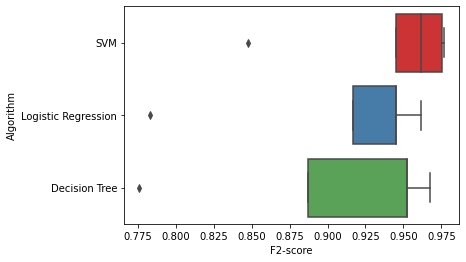

<AxesSubplot:xlabel='Training time', ylabel='Algorithm'>

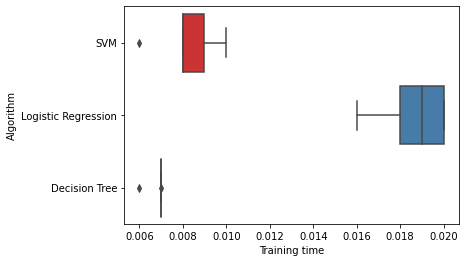

In [78]:
sns.boxplot(y="Algorithm", x="F2-score", palette=sns_palette,
            data=res_best)
plt.show()
sns.boxplot(y="Algorithm", x="Training time", palette=sns_palette,
            data=res_best)

In [79]:
res_best.groupby(['Algorithm']).agg({'F2-score': [ 'min', 'mean', 'max', 'std']})

F2-score                              
                          min      mean       max       std
Algorithm                                                  
Decision Tree        0.775862  0.907093  0.967742  0.079690
Logistic Regression  0.782609  0.910116  0.961538  0.073080
SVM                  0.847458  0.941210  0.976563  0.053966